<a href="https://colab.research.google.com/github/Bushra1423/MedDiagnose2/blob/main/Brain_Tumor_Classification_using_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp /kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to secure the file


In [3]:
!kaggle datasets download -d rishiksaisanthosh/brain-tumour-classification -p /content/


Dataset URL: https://www.kaggle.com/datasets/rishiksaisanthosh/brain-tumour-classification
License(s): unknown


In [4]:
import zipfile
import os

zip_path = "/content/brain-tumour-classification.zip"  # Update if needed
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [5]:
ls /content/dataset/

BrainTumor_1/


In [6]:
import os
import pandas as pd

# Update base path to the extracted dataset directory
base_path = "/content/dataset/BrainTumor_1/Train"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

image_paths = []
labels = []

# Loop through each category and collect image paths and labels
for category in categories:
    category_path = os.path.join(base_path, category)
    if not os.path.exists(category_path):
        print(f"Warning: {category_path} does not exist. Skipping...")
        continue
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

# Create a DataFrame
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

# Display first few rows
print(df.head())


                                          image_path   label
0  /content/dataset/BrainTumor_1/Train/glioma/131...  glioma
1  /content/dataset/BrainTumor_1/Train/glioma/457...  glioma
2  /content/dataset/BrainTumor_1/Train/glioma/334...  glioma
3  /content/dataset/BrainTumor_1/Train/glioma/432...  glioma
4  /content/dataset/BrainTumor_1/Train/glioma/147...  glioma


In [7]:
df.head()

,image_path,label
0,/content/dataset/BrainTumor_1/Train/glioma/131...,glioma
1,/content/dataset/BrainTumor_1/Train/glioma/457...,glioma
2,/content/dataset/BrainTumor_1/Train/glioma/334...,glioma
3,/content/dataset/BrainTumor_1/Train/glioma/432...,glioma
4,/content/dataset/BrainTumor_1/Train/glioma/147...,glioma


In [8]:
df.tail()

,image_path,label
22843,/content/dataset/BrainTumor_1/Train/pituitary/...,pituitary
22844,/content/dataset/BrainTumor_1/Train/pituitary/...,pituitary
22845,/content/dataset/BrainTumor_1/Train/pituitary/...,pituitary
22846,/content/dataset/BrainTumor_1/Train/pituitary/...,pituitary
22847,/content/dataset/BrainTumor_1/Train/pituitary/...,pituitary


In [9]:
df.shape

(22848, 2)

In [10]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [11]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [12]:
df['label'].value_counts()

,count
label,
notumor,6380
pituitary,5828
meningioma,5356
glioma,5284


<ipython-input-13-75711d33cd20>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


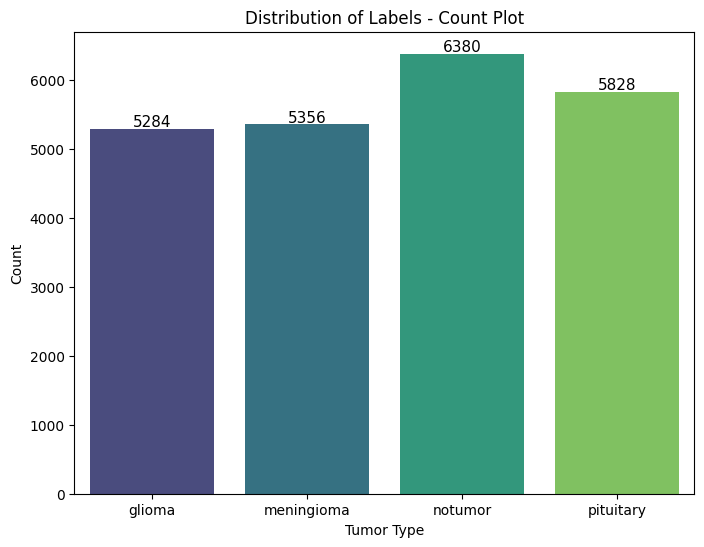

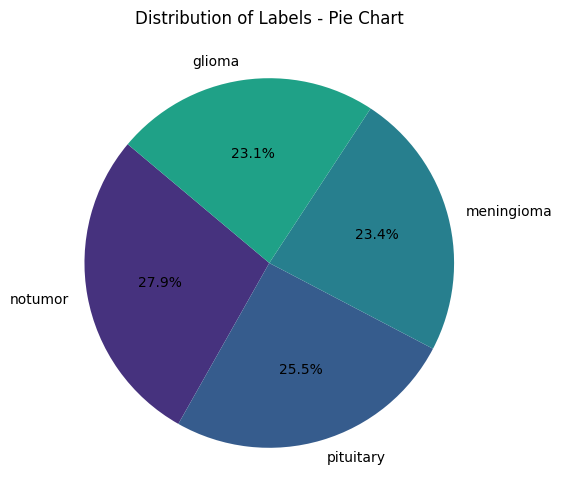

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

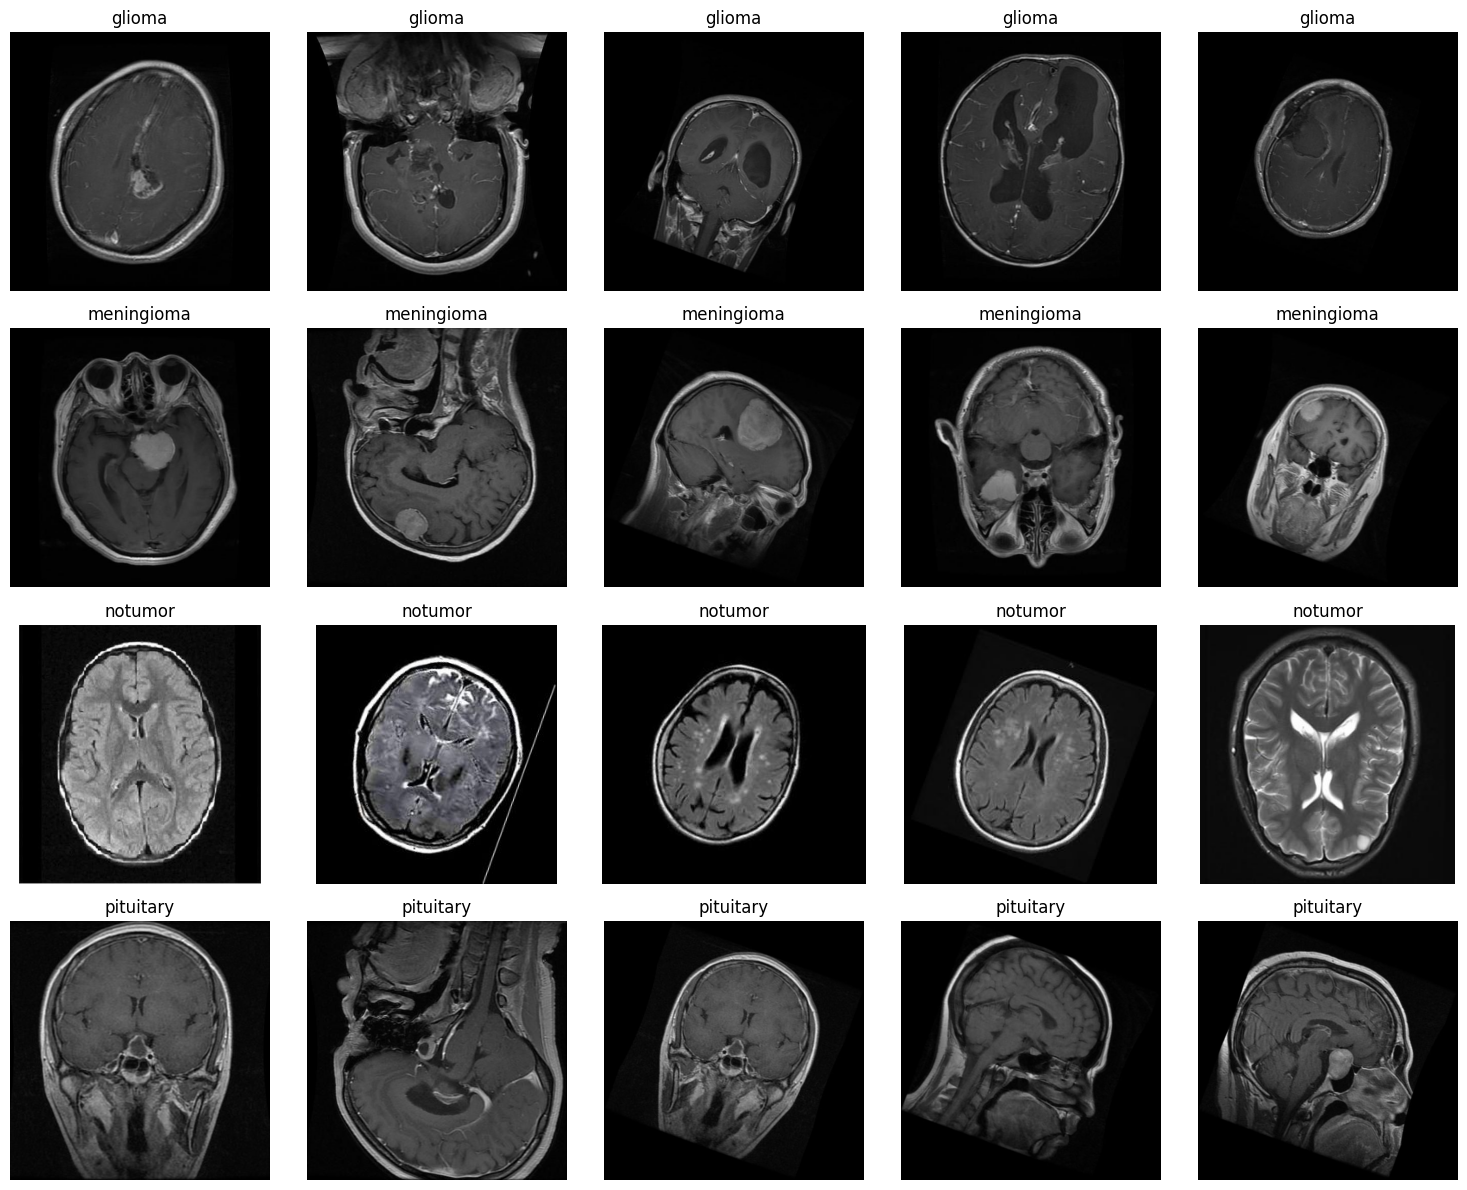

In [14]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [16]:
df = df[['image_path', 'category_encoded']]

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [19]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [20]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    6380
1    6380
2    6380
3    6380
Name: count, dtype: int64


In [21]:
df_resampled

,image_path,category_encoded
0,/content/dataset/BrainTumor_1/Train/glioma/131...,0
1,/content/dataset/BrainTumor_1/Train/glioma/457...,0
2,/content/dataset/BrainTumor_1/Train/glioma/334...,0
3,/content/dataset/BrainTumor_1/Train/glioma/432...,0
4,/content/dataset/BrainTumor_1/Train/glioma/147...,0
...,...,...
25515,/content/dataset/BrainTumor_1/Train/pituitary/...,3
25516,/content/dataset/BrainTumor_1/Train/pituitary/...,3
25517,/content/dataset/BrainTumor_1/Train/pituitary/...,3
25518,/content/dataset/BrainTumor_1/Train/pituitary/...,3


In [22]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [24]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [25]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


In [26]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [27]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

GPU is set for TensorFlow


In [28]:
from tensorflow.keras import layers

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size, padding='valid')

    def call(self, images):
        patches = self.proj(images)
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, self.embed_dim))  # Flatten patches
        return patches

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, num_heads, embed_dim):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

    def call(self, inputs):
        return self.attention(inputs, inputs)

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout_rate):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(num_heads, embed_dim)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim),
            layers.Dropout(dropout_rate)
        ])

    def call(self, inputs):
        x = self.layernorm1(inputs)
        x = self.attention(x)
        x = x + inputs
        x = self.layernorm2(x)
        x = self.mlp(x)
        return x + inputs

class VisionTransformer(tf.keras.Model):
    def __init__(self, image_size, patch_size, embed_dim, num_heads, num_blocks, mlp_dim, num_classes, dropout_rate=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)

        height, width, _ = image_size
        num_patches = (height // patch_size) * (width // patch_size)

        self.pos_embed = self.add_weight(
            name="pos_embed",
            shape=(1, num_patches + 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.cls_token = self.add_weight(
            name="cls_token",
            shape=(1, 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.dropout = layers.Dropout(dropout_rate)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, mlp_dim, dropout_rate) for _ in range(num_blocks)]
        self.layernorm = layers.LayerNormalization(epsilon=1e-6)
        self.classifier = layers.Dense(num_classes, activation='softmax')

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = self.patch_embed(images)

        cls_tokens = tf.repeat(self.cls_token, repeats=batch_size, axis=0)
        x = tf.concat([cls_tokens, patches], axis=1)

        pos_embed = tf.repeat(self.pos_embed, repeats=batch_size, axis=0)
        x = x + pos_embed
        x = self.dropout(x)

        for block in self.transformer_blocks:
            x = block(x)

        x = self.layernorm(x)
        cls_token_final = x[:, 0]
        return self.classifier(cls_token_final)


image_size = (224, 224, 3)
patch_size = 16
embed_dim = 256
num_heads = 8
num_blocks = 6
mlp_dim = 256
num_classes = 4
dropout_rate = 0.1
learning_rate = 1e-5

vit_model = VisionTransformer(image_size=image_size,
                              patch_size=patch_size,
                              embed_dim=embed_dim,
                              num_heads=num_heads,
                              num_blocks=num_blocks,
                              mlp_dim=mlp_dim,
                              num_classes=num_classes,
                              dropout_rate=dropout_rate)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [30]:
epochs = 5
history = vit_model.fit(train_gen_new, epochs=epochs, batch_size = 32, validation_data=valid_gen_new)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 231s 181ms/step - accuracy: 0.8946 - loss: 0.2862 - val_accuracy: 0.8805 - val_loss: 0.3246
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 229s 179ms/step - accuracy: 0.9125 - loss: 0.2403 - val_accuracy: 0.9063 - val_loss: 0.2561
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 229s 180ms/step - accuracy: 0.9150 - loss: 0.2230 - val_accuracy: 0.9060 - val_loss: 0.2516
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 229s 180ms/step - accuracy: 0.9265 - loss: 0.1991 - val_accuracy: 0.9158 - val_loss: 0.2257
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 229s 179ms/step - accuracy: 0.9343 - loss: 0.1742 - val_accuracy: 0.9271 - val_loss: 0.2100


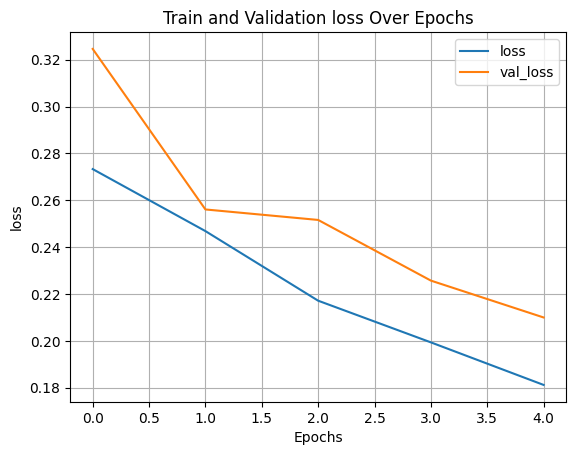

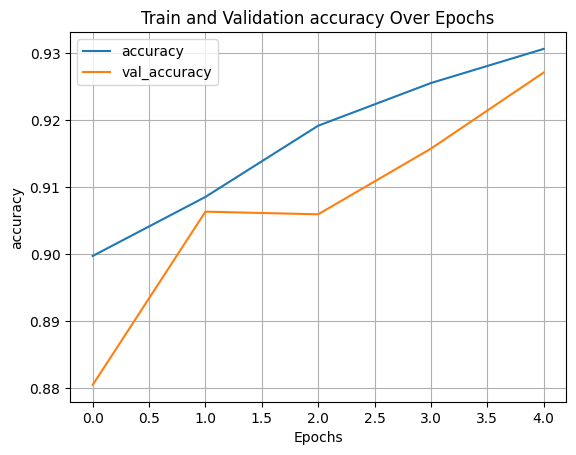

In [32]:
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title(f"Train and Validation {item} Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

plot_history("loss")
plot_history("accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


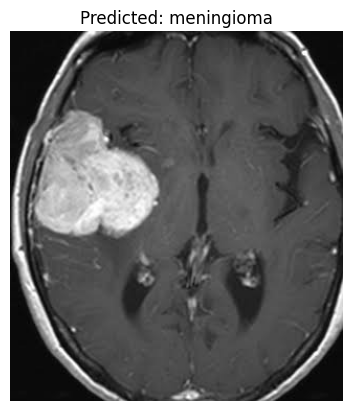

Model Prediction: meningioma


In [35]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values if required
    return img_array

# Function to make a prediction
def predict_image(model, img_path, class_labels):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get class with highest probability

    # Display the image with the predicted class
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.show()

    return class_labels[predicted_class]

# Define your class labels based on training data
class_labels = ["glioma", "meningioma", "notumor", "pituitary"] # Replace with actual class names

# Test with an image
image_path = "/content/Te-me_0025.jpg"  # Replace with the actual image path
predicted_class = predict_image(vit_model, image_path, class_labels)
print(f"Model Prediction: {predicted_class}")


In [38]:
vit_model.save("vit_model.keras")

In [ ]:
vit_model.save("vit_model.h5")